In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


- load the data (1% - 10%)
- process the data (60%-80%)
- visualize the data (~%)

In [ ]:
print(plt.style.available)
plt.style.use('ggplot')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
canada = pd.read_excel('Canada.xlsx', sheet_name = 1, skiprows = 20, skipfooter = 2)


- Dataframe -> 2D matrix with rows and column
- Series - 1D matrix with 1 cols

Selection of data


In [ ]:
canada

### selection of data
- head() - top 5
- tail() - last 5
- sample() -random 5

In [ ]:
canada.head(5)

In [ ]:
canada.sample()

- single column
  - dict style
  - object
- multiple column
  - list style


In [ ]:
canada['AreaName']

In [ ]:
canada[2010]

In [ ]:
canada.OdName

In [ ]:
canada['OdName']

In [ ]:
cols = ['OdName', 1980, 1990, 2000, 2010]
canada[cols] # list of columns-> returns dataframe

Row wise slicing
- iloc[] - indexed location
- loc[] - labelled location


In [ ]:
canada.iloc[69]

In [ ]:
canada.iloc[66, 39]

In [ ]:
canada.iloc[66,9:]

In [ ]:
canada.iloc[66, 9:].plot(kind='bar')

In [ ]:
canada.set_index('OdName')

In [ ]:
canada.index

In [ ]:
canada.set_index('OdName', inplace = True)

In [ ]:
years = list(range(1980,2014))
print(years)

In [ ]:
canada.loc['Japan', years].plot(kind= 'area',color = 'green', title= 'Japan Immegration to Canada', figsize = (15,5)) 

In [ ]:
countries = ['Pakistan', 'India', 'France']
canada.loc[countries, years]

In [ ]:
canada.loc[countries, years].T.plot(kind = 'line', title = f'{", ".join(countries)}', figsize = (15,5))
plt.savefig('comparing-3-countries.png')

What is loc property?


sort index helps to sort the index of the dataframe if it is not sorted


In [ ]:
canada.sort_index(ascending = False)

In [ ]:
canada.sort_values(by = 1980, ascending = False)

In [ ]:
canada.sort_values(by = 'AreaName', inplace = True)

In [ ]:
canada

In [ ]:
canada.sort_values(by=['AreaName','DevName'], ascending = [True, False])

In [ ]:
canada['AreaName'] == "Africa"

In [ ]:
canada[canada['AreaName'] == "Europe"]

In [ ]:
canada[canada['AreaName'] == "Oceania"]

In [ ]:
canada[canada[2013]>20000]

stats and maths

In [ ]:
canada.describe()  # for numerical columns

In [ ]:
canada.describe(exclude = np.number)  # every column except for the numeric ones

In [ ]:
canada [[1980, 1990, 2000, 2010]].sum()

In [ ]:
canada [[1980, 1990, 2000, 2010]].agg(['mean', 'sum']).T.plot(kind = 'bar')

add column

In [ ]:
canada['AreaName'].value_counts()

In [ ]:
canada['DevName'].value_counts()

add column

In [ ]:
canada[years].sum(axis = 1)

In [ ]:
canada['Total'] = canada[years].sum(axis = 1)

In [ ]:
canada.head(2)

In [ ]:
canada

In [ ]:
cols_to_drop = ['Type', 'Coverage', 'AREA', 'REG', 'DEV']
canada.drop(columns = cols_to_drop, inplace = True)
canada


In [ ]:
canada.drop_duplicates(subset = ['AreaName'])

renaming columns


In [ ]:
canada.sample()

In [ ]:
canada.rename(mapper = {
    'AreaName': 'Continent',
    'RegName' : 'Region',
    'DevName' : 'Status'
}, axis = 1, inplace = True)

In [ ]:
canada.head(2)

In [ ]:
updated_list = ['Status', 'Continent', 'Region', 'Total']+ years
print(updated_list)

In [ ]:
canada = canada[updated_list]

In [ ]:
canada[updated_list]

In [ ]:
canada.head(2)

grouping


In [ ]:
canada.groupby('Status').get_group('Developed regions')

In [ ]:
canada.groupby('Continent').get_group('Europe')

array([[<Axes: ylabel='2000'>],
       [<Axes: ylabel='2010'>]], dtype=object)

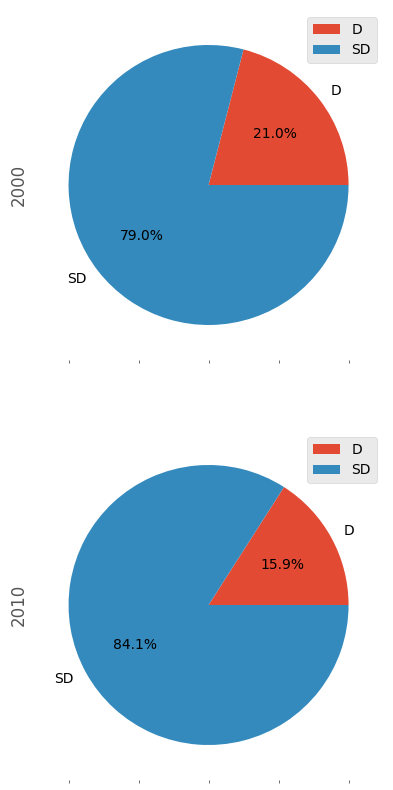

In [67]:
canada.groupby('Status')[[2000,2010]].sum().plot(kind= 'pie', subplots = True, labels = ['D','SD'],
                                                 autopct = '%1.1f%%',
                                                 figsize = (5, 10),
                                                 layout = (2,1))